In [ ]:
'''
*outlier is or points which are distinct from other points in datasets
*criteria to identify outliers:
1.data point falls 1.5 times of an interquantilr range above the third quantile and below the 1st quantile
2.data point falls outside of 3 standard deviations use z-score if z-score falls outside of 2 standard deviations
*reasons:
1.Variablity in data
2.experimental measurment error
*impacts:
1.causes inaccurate statistical analysis
2.causes impact on mean and standard deviation
*methods of finding outliers
1.IQR
2.z-score
3.Scatter plot
4.Box-plot

'''
#short notes on outliers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)#creating random data
outliers=np.array([10,110,5,120])#outliers
data=np.concatenate([data,outliers])

In [5]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [6]:
print(df.tail())

         Values
99    47.654129
100   10.000000
101  110.000000
102    5.000000
103  120.000000


# Using Scatterplot

## Scatter plot is used to show datapoints in scattered form detecting outliers ##

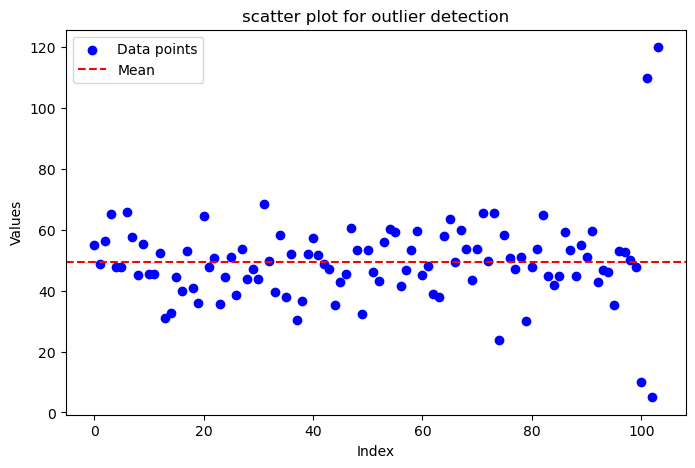

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title("scatter plot for outlier detection")
plt.legend()
plt.show()

# Box plot

## A box plot is used for spotting extreme values using quartiles ##

plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box plot for outlier detection")
plt.show()

# z-score Method

z-score formula is :
$$ z = (x-μ)/σ $$


 where:
 $$x=data point$$
 $$μ=mean of dataset$$
 $$σ=standard deviation of dataset$$

Steps:

1.Compute the z-score for each point.

2.if Z-score>3 or z-score<-3,mark it as outlier.

In [20]:
df['Z-score'] = zscore(df['Values'])
df['Outlier_Z'] = df['Z-score'].apply(lambda x: 'outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z'] == 'outlier'])

     Values   Z-score Outlier_Z
101   110.0  4.328173   outlier
102     5.0 -3.175368   outlier
103   120.0  5.042796   outlier


# Interquantile Range(IQR) Method

The IQR formula is:


IQR=Q1+Q3

Steps:

1.Calculate Q1(25th percentile) and Q3(75th percentile)

2.Compute IQR=Q3-Q1

3.define lower and upper bounds
* $$lower bound=Q1-1.5*IQR$$
* $$upper bound = Q3+1*IQR$$

4.Any value outside the bounds is an outlier

In [22]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['Outlier_IQR']=df['Values'].apply(lambda x: 'Outlier' if(x<lower_bound or x>upper_bound)else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])#display outlier

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   outlier     Outlier
102    5.000000 -3.175368   outlier     Outlier
103  120.000000  5.042796   outlier     Outlier


# Final Summary

1.Scatter Plot: Outliers far from the main charecter

2.Box plot:Outliers are Outside for whiskers

3.Z-score: Values with Z>3 OR Z<-3 are Outliers

4.IQR Method: Values outside[Q1-1.5*IQR,Q3+1.5*IQR]are outliers

 **Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
* Minimum (Q0) → The smallest value in the dataset.
 
* First Quartile (Q1) → The 25th percentile (lower quartile).
 
* Median (Q2) → The 50th percentile (middle value).
 
* Third Quartile (Q3) → The 75th percentile (upper quartile).
 
* Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
$$ IQR=Q3−Q1 $$
 
Any value outside the range:
 
$$[Q1−1.5×IQR,Q3+1.5×IQR] $$

is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [27]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=data[(data<lower_bound)|(data>upper_bound)]
print(f"S-Number Summary:\nMin:{min_value},Q1:{Q1},Median(Q2):{Q3},Max:{max_value}")
print(f"IQR:{IQR}")
print(f"Lower bound:{lower_bound},Upper Bound{upper_bound}")
print(f"Outliers:{outliers}")

S-Number Summary:
Min:5.0,Q1:43.874401021766715,Median(Q2):55.00852473036764,Max:120.0
IQR:11.134123708600924
Lower bound:27.17321545886533,Upper Bound71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
